In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [7]:
cast.year.min()

1894

### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [13]:
supermanYears = 0
for year in range(1894, 2024):
    if cast[(cast.year == year)&(cast.character == "Superman")].character.count() > cast[(cast.year == year)&(cast.character == "Batman")].character.count():
        supermanYears+=1
supermanYears

24

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [15]:
batmanYears = 0
for year in range(1894, 2024):
    if cast[(cast.year == year)&(cast.character == "Superman")].character.count() < cast[(cast.year == year)&(cast.character == "Batman")].character.count():
        batmanYears+=1
batmanYears

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

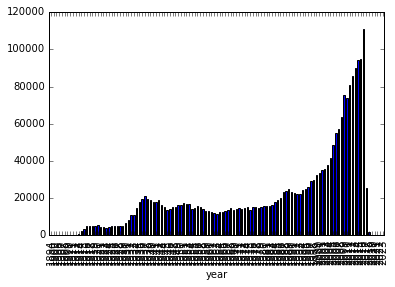

In [14]:
cast[(cast.type == "actor")].groupby(["year"]).size().plot(kind = "bar")

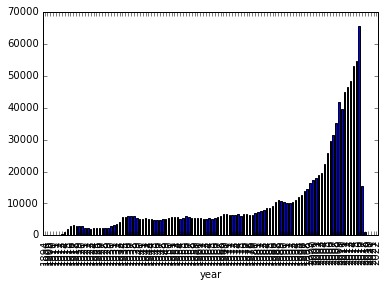

In [17]:
cast[(cast.type == "actress")].groupby(["year"]).size().plot(kind = "bar")

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

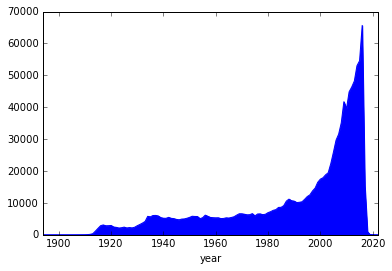

In [18]:
cast[(cast.type == "actress")].groupby(["year"]).size().plot(kind = "area")

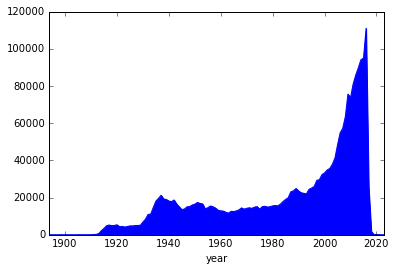

In [19]:
cast[(cast.type == "actor")].groupby(["year"]).size().plot(kind = "area")

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

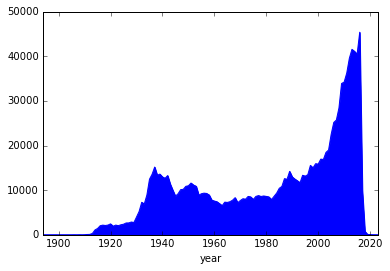

In [20]:
(cast[(cast.type == "actor")].groupby(["year"]).size()-cast[(cast.type == "actress")].groupby(["year"]).size()).plot(kind="area")

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

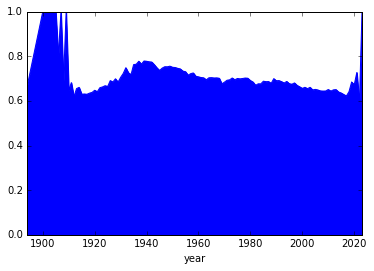

In [21]:
(cast[(cast.type == "actor")].groupby(["year"]).size()/cast.groupby(["year"]).size()).plot(kind="area")

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

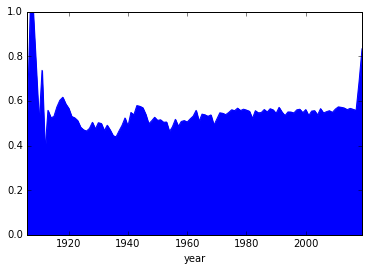

In [22]:
(cast[(cast.type == "actor")&(cast.n == 2)].groupby(["year"]).size()/cast[cast.n == 2].groupby(["year"]).size()).plot(kind="area")

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

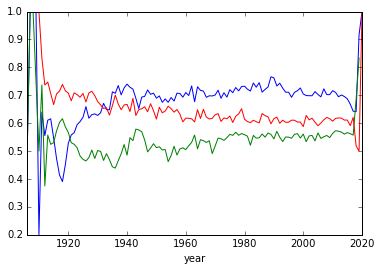

In [23]:
for n in range(1,4):
    (cast[(cast.n == n)&(cast.type == "actor")].groupby(["year"]).size()/cast[(cast.n == n)].groupby(["year"]).size()).plot(kind="line")